# First Exploration Plots

## Import data

In [74]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train_5 = pd.read_csv('../Data/X_train_window_size_5_time_encoding_True.csv')
y_train_5 = pd.read_csv('../Data/y_train_window_size_5_time_encoding_True.csv')

## Helper Functions

Maybe put them into a subfolder in a .py file and import them...

In [76]:
def plot_subplots(dataframe: pd.DataFrame, title: str):
    """
    Draws one subplot for each of the columns in the DataFrame.
    """
    
    fig, axes = plt.subplots(nrows=len(dataframe.columns), figsize=(20,20))
    labels = list(dataframe.columns)

    for idx, row in enumerate(axes):
        y = dataframe.iloc[:, idx]
        row.plot(y, label=y.name)
        row.set_ylabel(labels[idx])

    fig.set_facecolor("grey")
    fig.suptitle(title, size=15, y=0.9)
    plt.show()

In [77]:
def plot_subplots_wrapper(
    dataframe: pd.DataFrame,
    title: str,
    labels: list = ["open", "high", "low", "close", "volume", "minutes"]
    ):
    """
    Calls the 'plot_subplots' function for each label provided in labels and selects columns that start with the label.
    """

    #df = dataframe.copy()
    for label in labels:
        print(f"Plots for {label}:")
        title = title + f" {label}"
        plot_subplots(dataframe.loc[:,dataframe.columns.str.startswith(label)], title)


## Some general measures and info printing

In [78]:
X_train_5["5"].max()

1860.0

In [79]:
X_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_hours             91512 non-null  float64
 1   dlvry_weekend           91512 non-null  float64
 2   dlvry_bank_holiday      91512 non-null  float64
 3   dlvry_day_sin           91512 non-null  float64
 4   dlvry_day_cos           91512 non-null  float64
 5   dlvry_weekday_sin       91512 non-null  float64
 6   dlvry_weekday_cos       91512 non-null  float64
 7   dlvry_hour_sin          91512 non-null  float64
 8   dlvry_hour_cos          91512 non-null  float64
 9   lasttrade_weekend       91512 non-null  float64
 10  lasttrade_bank_holiday  91512 non-null  float64
 11  lasttrade_day_sin       91512 non-null  float64
 12  lasttrade_day_cos       91512 non-null  float64
 13  lasttrade_weekday_sin   91512 non-null  float64
 14  lasttrade_weekday_cos   91512 non-null

## Renaming Columns

In [80]:
labels = ["open", "high", "low", "close", "volume", "minutes"]
new_cols = list(X_train_5.columns[:17])
for i in range(4, 0, -1):
    for label in labels:
        new_cols.append(label+f"_{i}_{i-1}")

X_train_5_original = X_train_5.copy()
X_train_5.columns = new_cols

In [81]:
X_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_hours             91512 non-null  float64
 1   dlvry_weekend           91512 non-null  float64
 2   dlvry_bank_holiday      91512 non-null  float64
 3   dlvry_day_sin           91512 non-null  float64
 4   dlvry_day_cos           91512 non-null  float64
 5   dlvry_weekday_sin       91512 non-null  float64
 6   dlvry_weekday_cos       91512 non-null  float64
 7   dlvry_hour_sin          91512 non-null  float64
 8   dlvry_hour_cos          91512 non-null  float64
 9   lasttrade_weekend       91512 non-null  float64
 10  lasttrade_bank_holiday  91512 non-null  float64
 11  lasttrade_day_sin       91512 non-null  float64
 12  lasttrade_day_cos       91512 non-null  float64
 13  lasttrade_weekday_sin   91512 non-null  float64
 14  lasttrade_weekday_cos   91512 non-null

## General plotting over all available data

Plots for open:


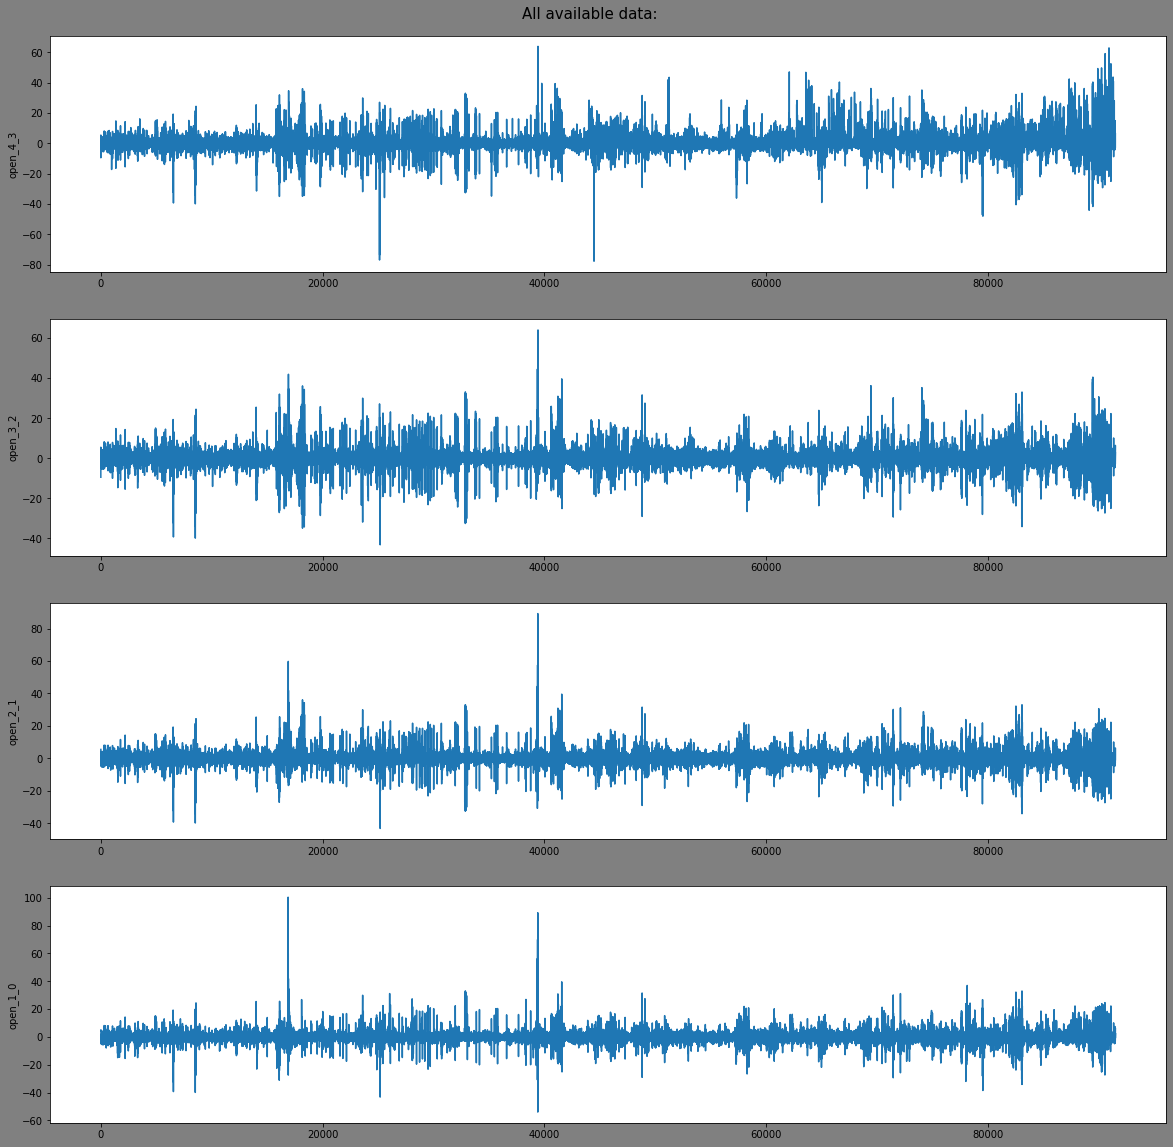

Plots for high:


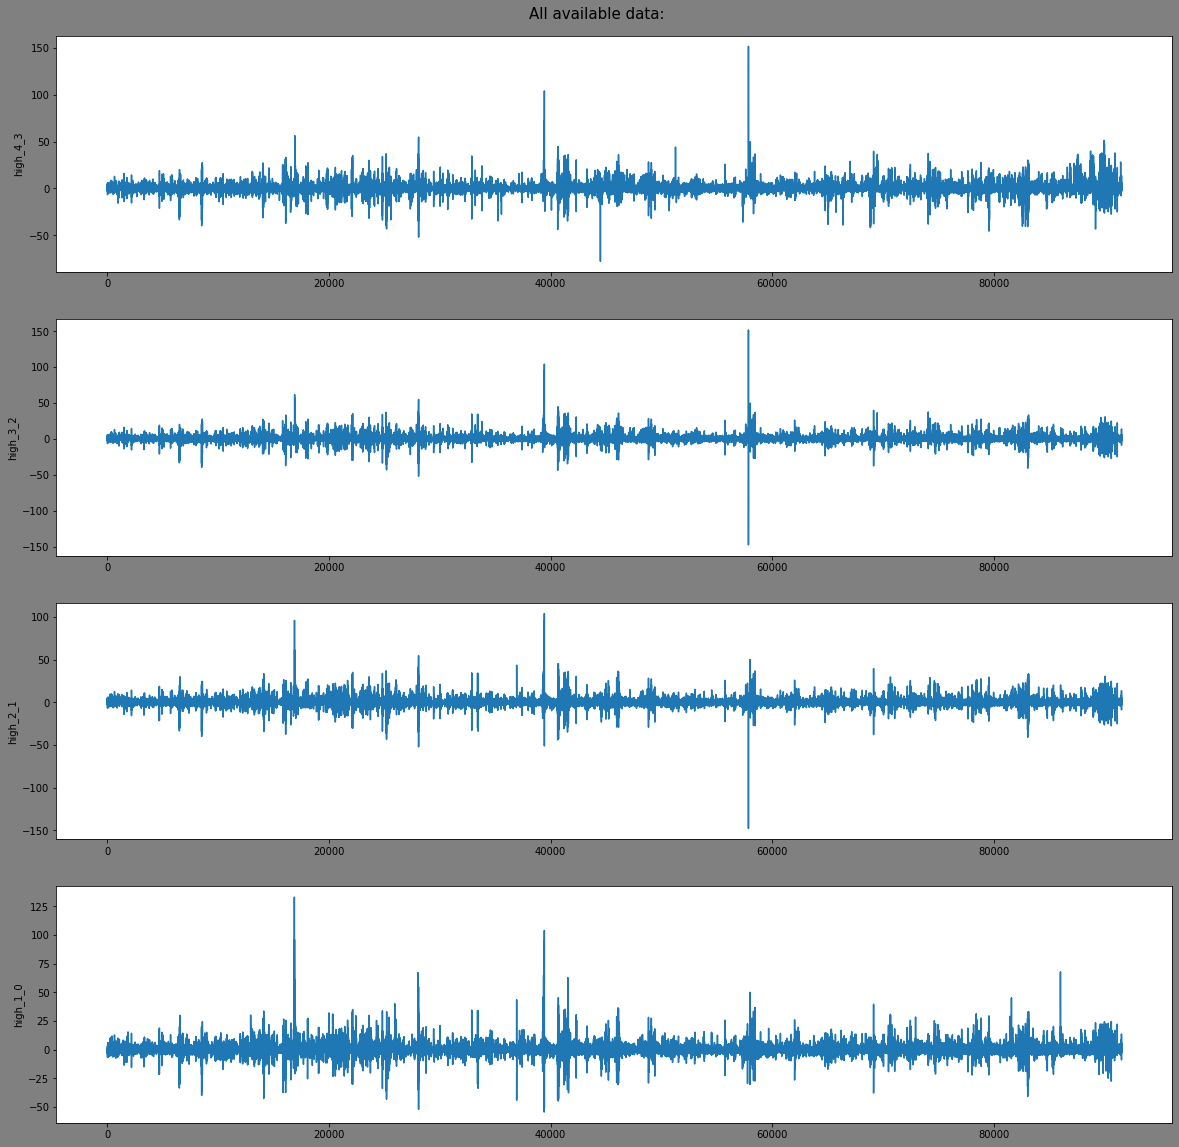

Plots for low:


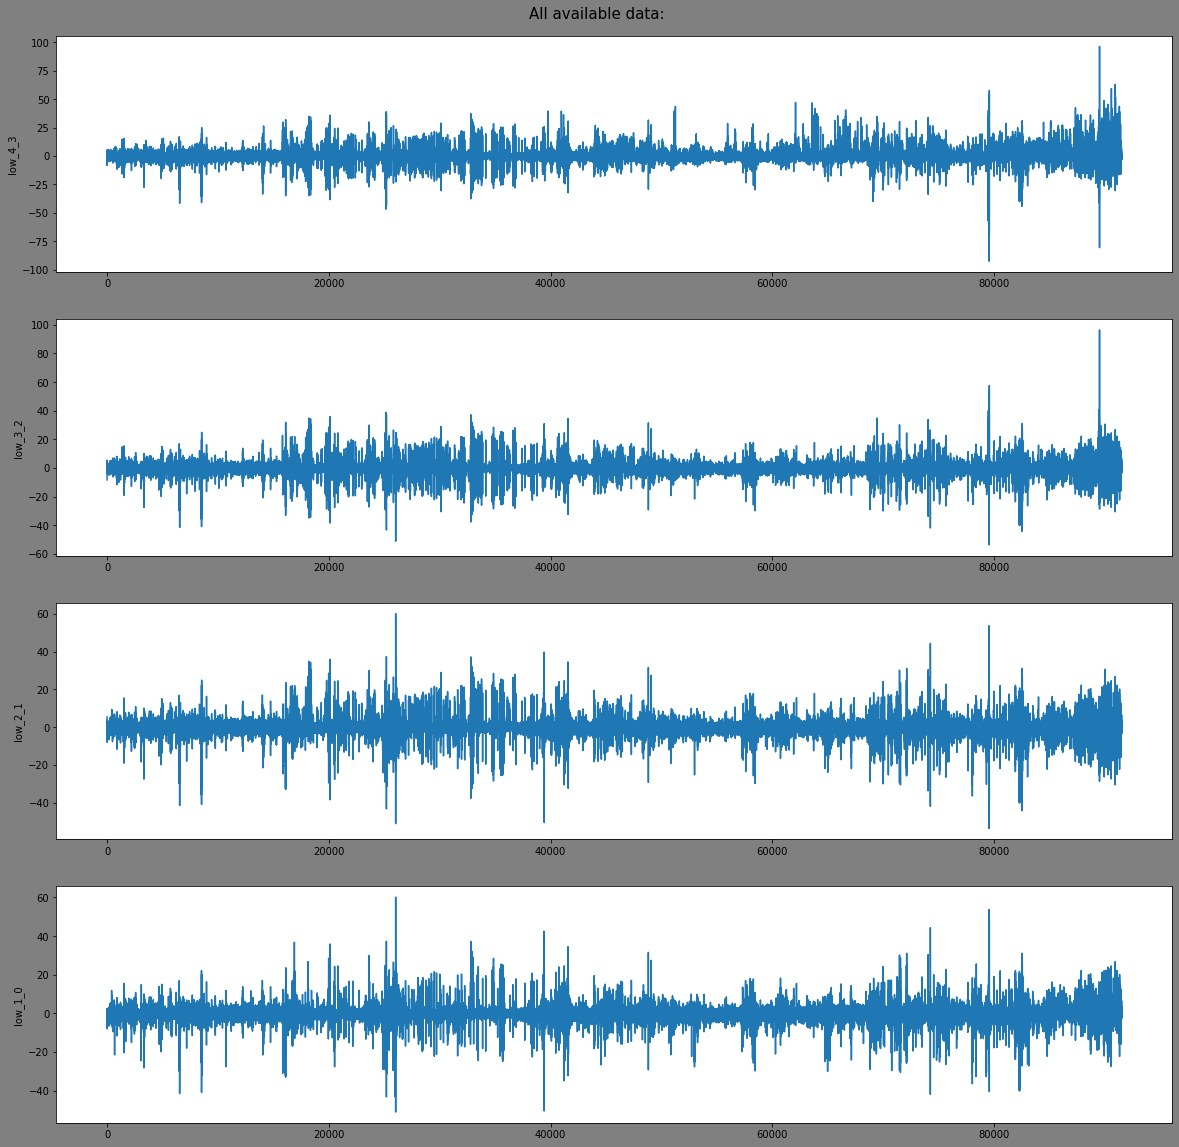

Plots for close:


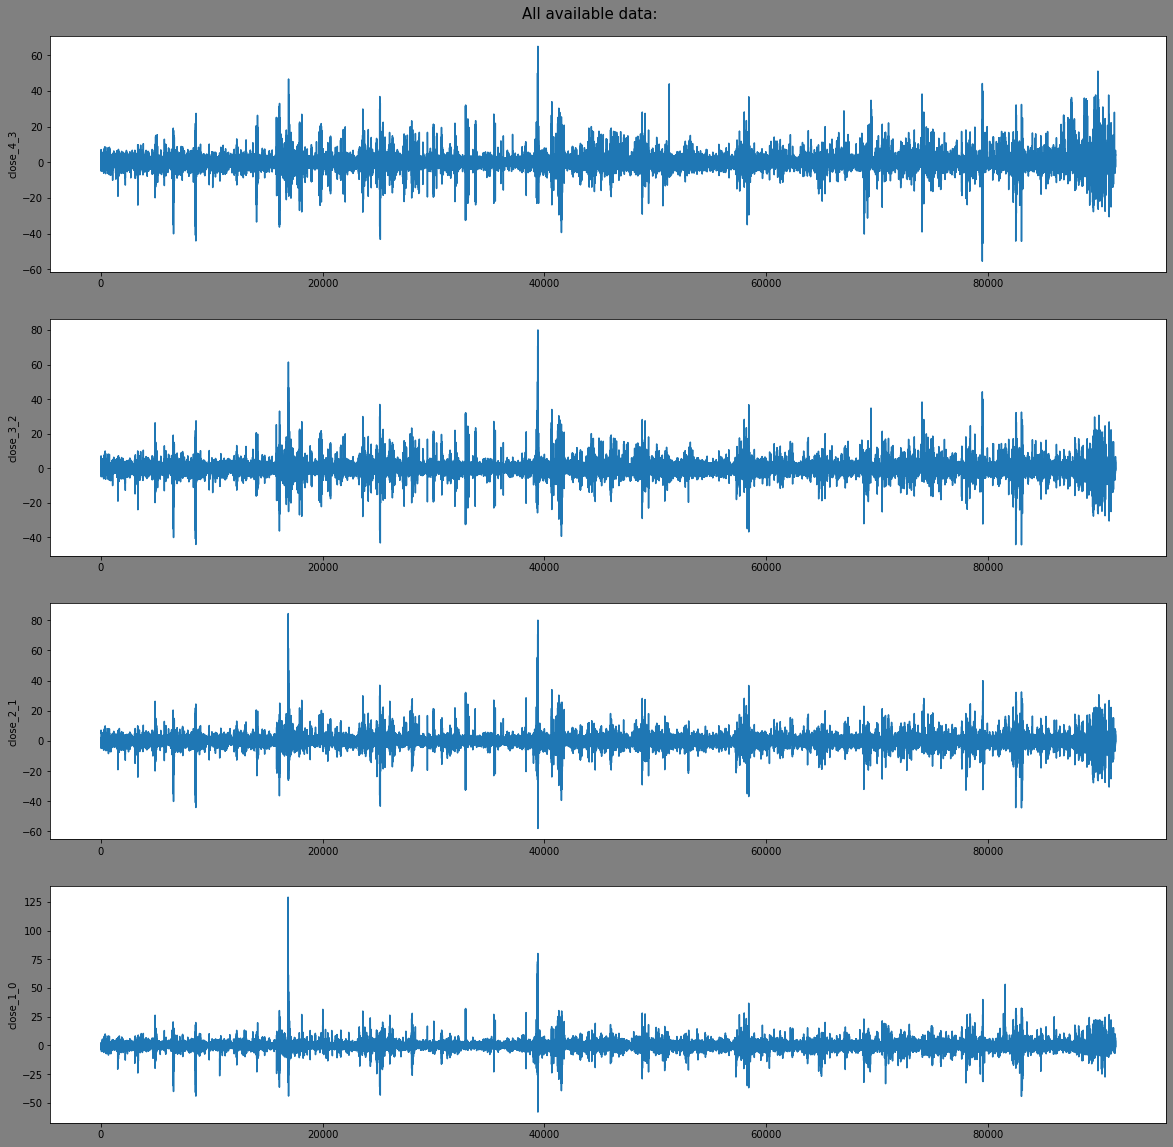

Plots for volume:


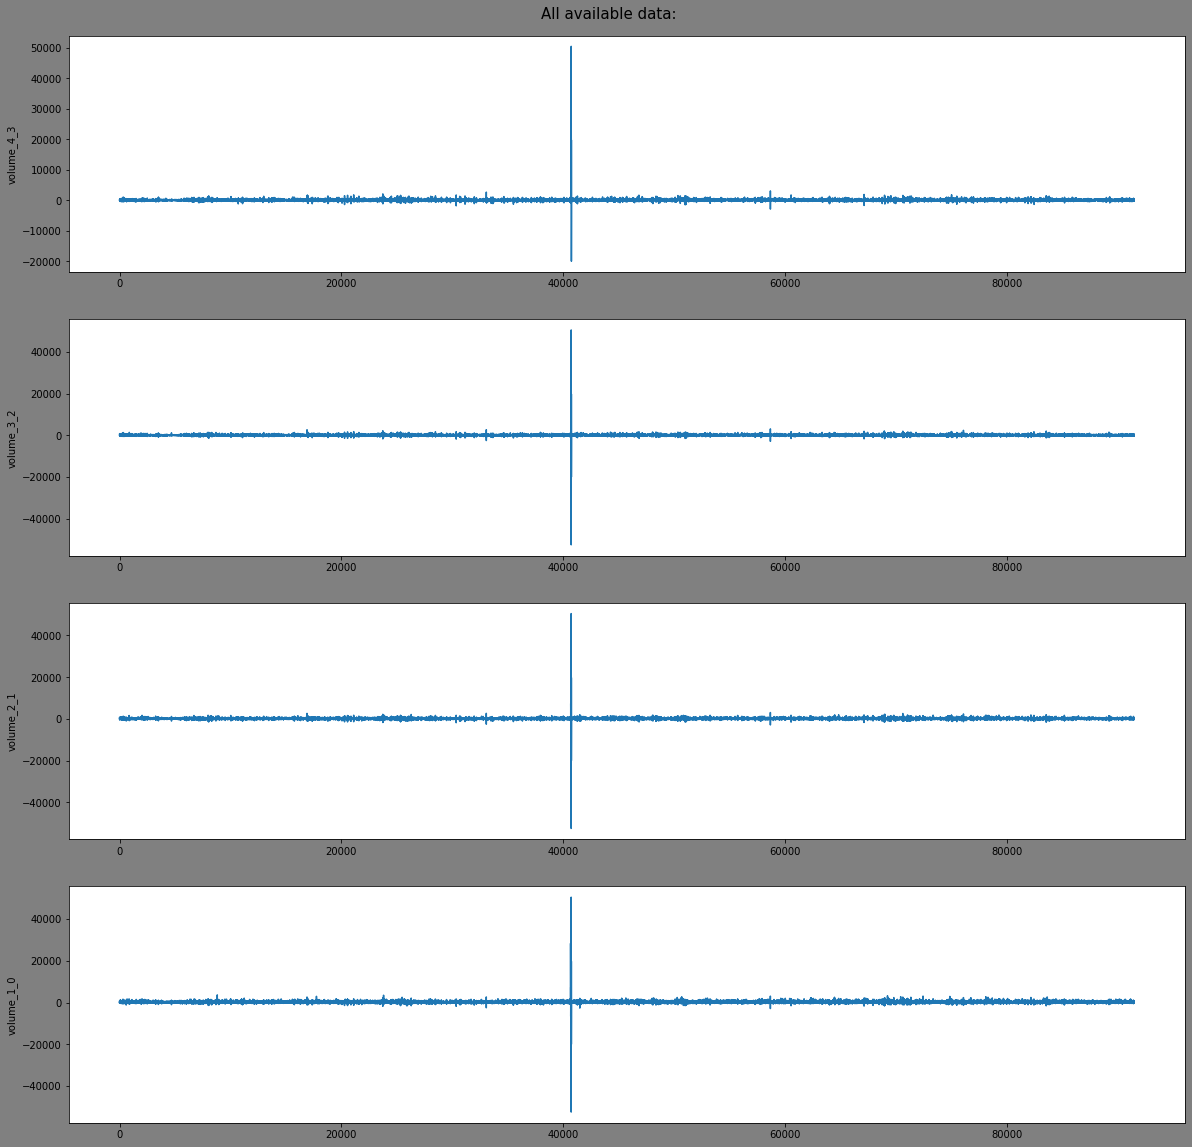

Plots for minutes:


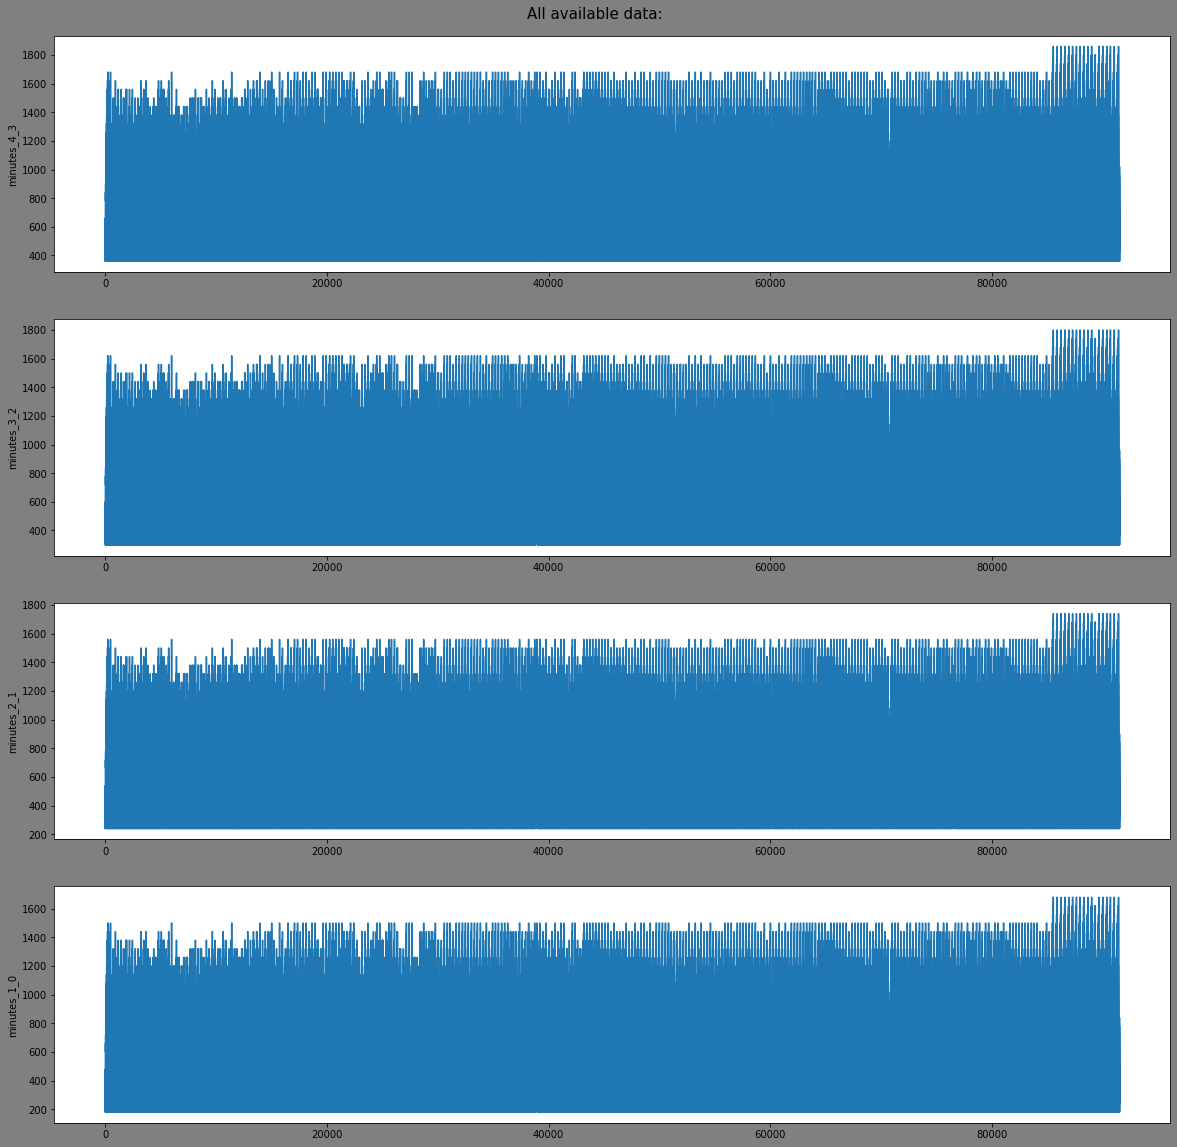

In [82]:
df_to_plot = X_train_5.copy()
#df_to_plot = df_to_plot.loc[:,df_to_plot.columns.str.startswith('volume')]
for label in ["open", "high", "low", "close", "volume", "minutes"]:
    print(f"Plots for {label}:")
    plot_subplots(df_to_plot.loc[:,df_to_plot.columns.str.startswith(label)], "All available data:")


### Correlation

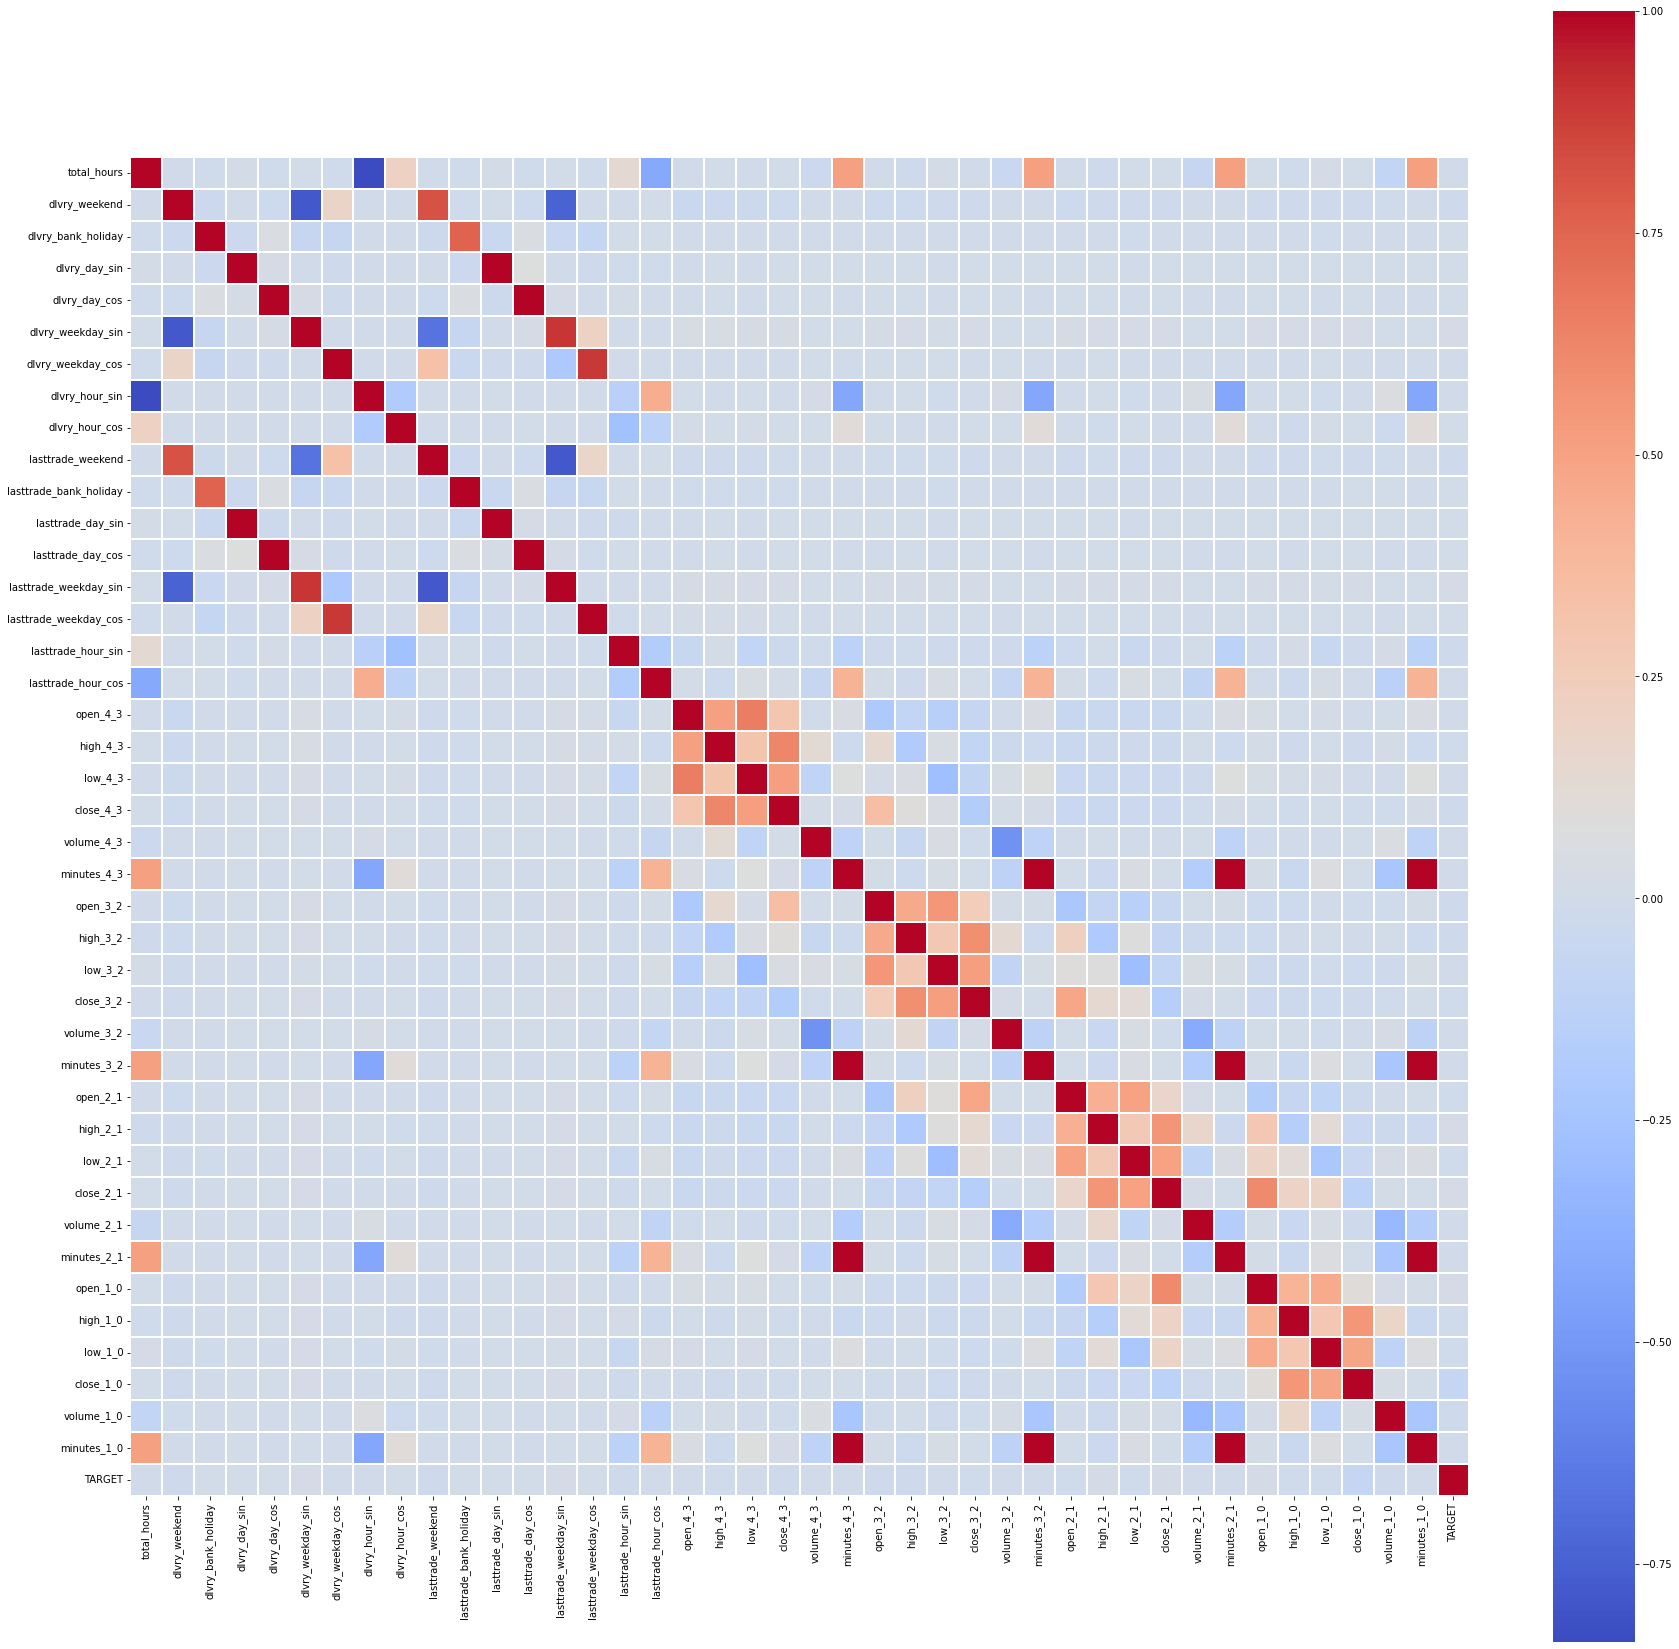

In [83]:
plt.figure(figsize=(30,30))
full_train_window_size_5 = X_train_5.copy()
full_train_window_size_5["TARGET"] = y_train_5["y"]
sns.heatmap(full_train_window_size_5.corr(), annot=False, linewidths = 2, square= True, cmap="coolwarm")
plt.show()

## Filtered plotting

### Minutes

#### Close to execution

In [84]:
X_train_5.min()

total_hours                   6.008203
dlvry_weekend                 0.000000
dlvry_bank_holiday            0.000000
dlvry_day_sin                -0.998717
dlvry_day_cos                -1.000000
dlvry_weekday_sin            -0.974928
dlvry_weekday_cos            -0.900969
dlvry_hour_sin               -1.000000
dlvry_hour_cos               -1.000000
lasttrade_weekend             0.000000
lasttrade_bank_holiday        0.000000
lasttrade_day_sin            -0.998717
lasttrade_day_cos            -1.000000
lasttrade_weekday_sin        -0.974928
lasttrade_weekday_cos        -0.900969
lasttrade_hour_sin           -1.000000
lasttrade_hour_cos           -1.000000
open_4_3                    -77.710000
high_4_3                    -77.710000
low_4_3                     -92.500000
close_4_3                   -55.490000
volume_4_3               -19986.100000
minutes_4_3                 360.000000
open_3_2                    -43.230000
high_3_2                   -147.650000
low_3_2                  

Plots for open:


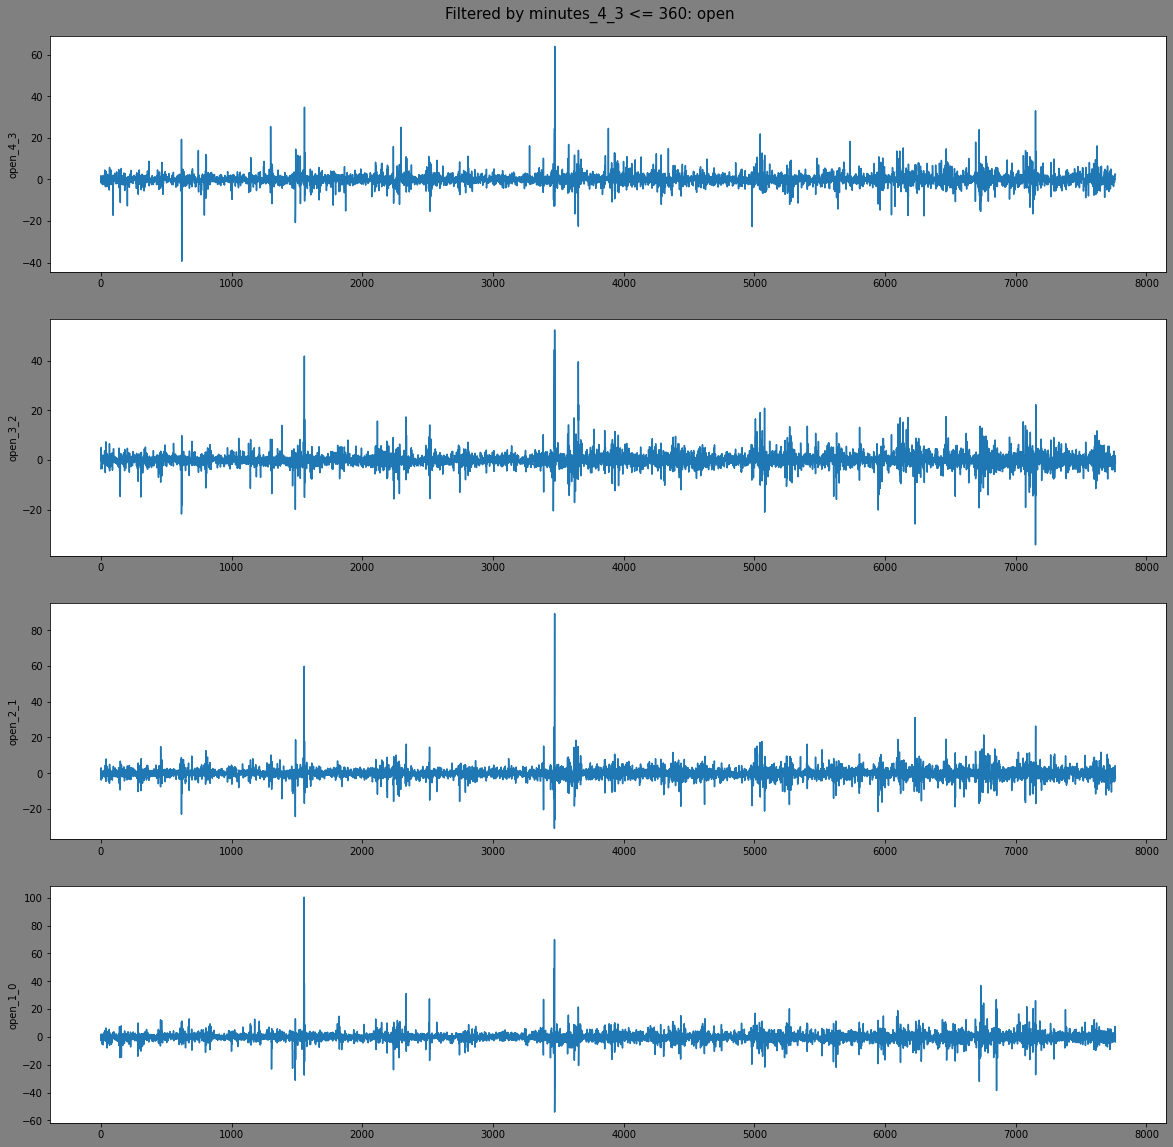

Plots for high:


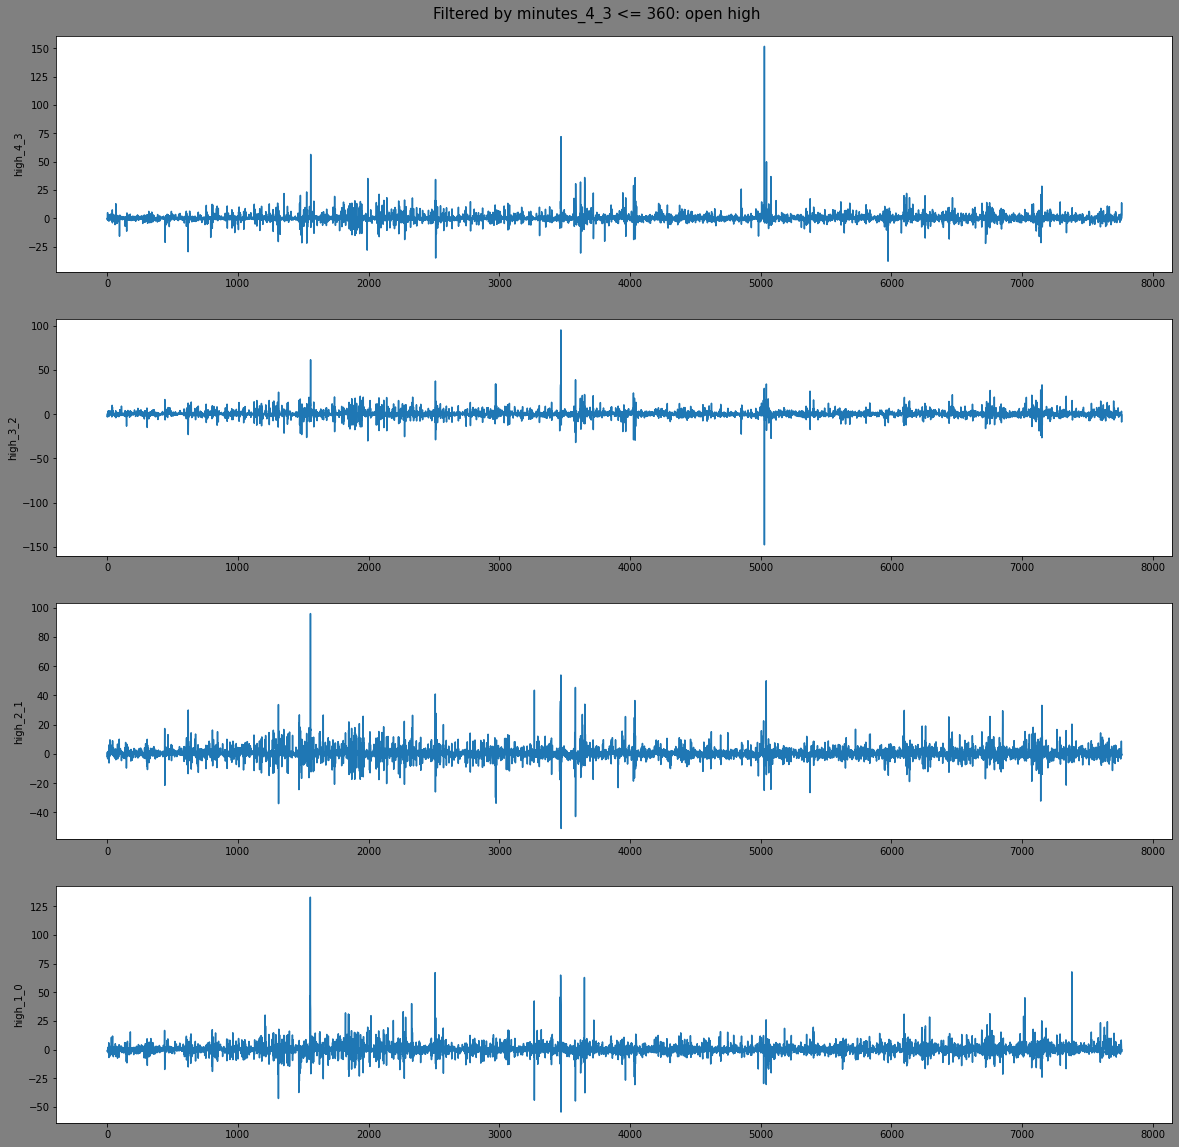

Plots for low:


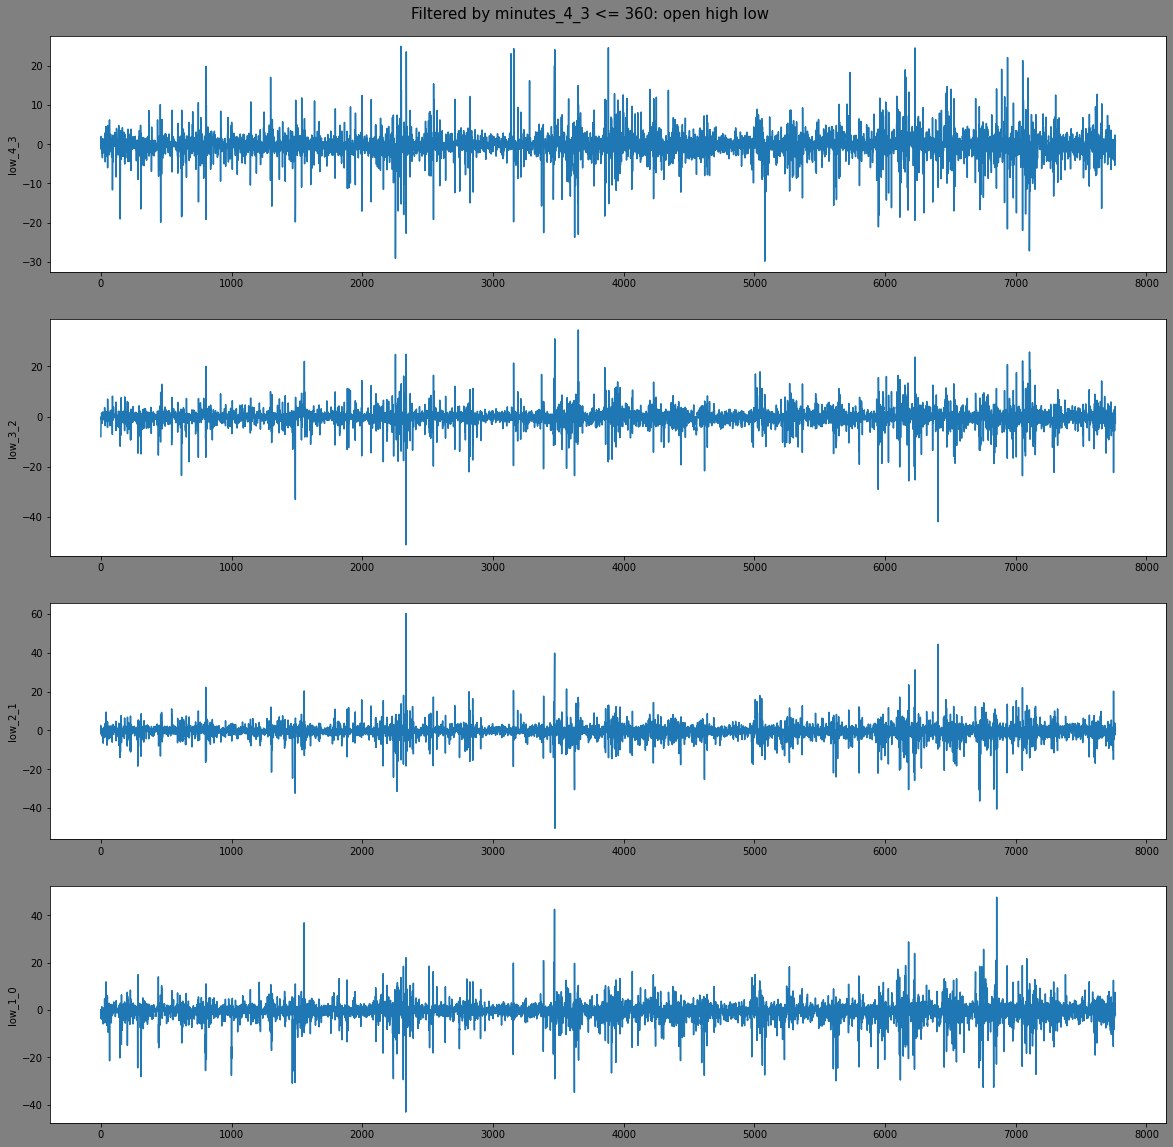

Plots for close:


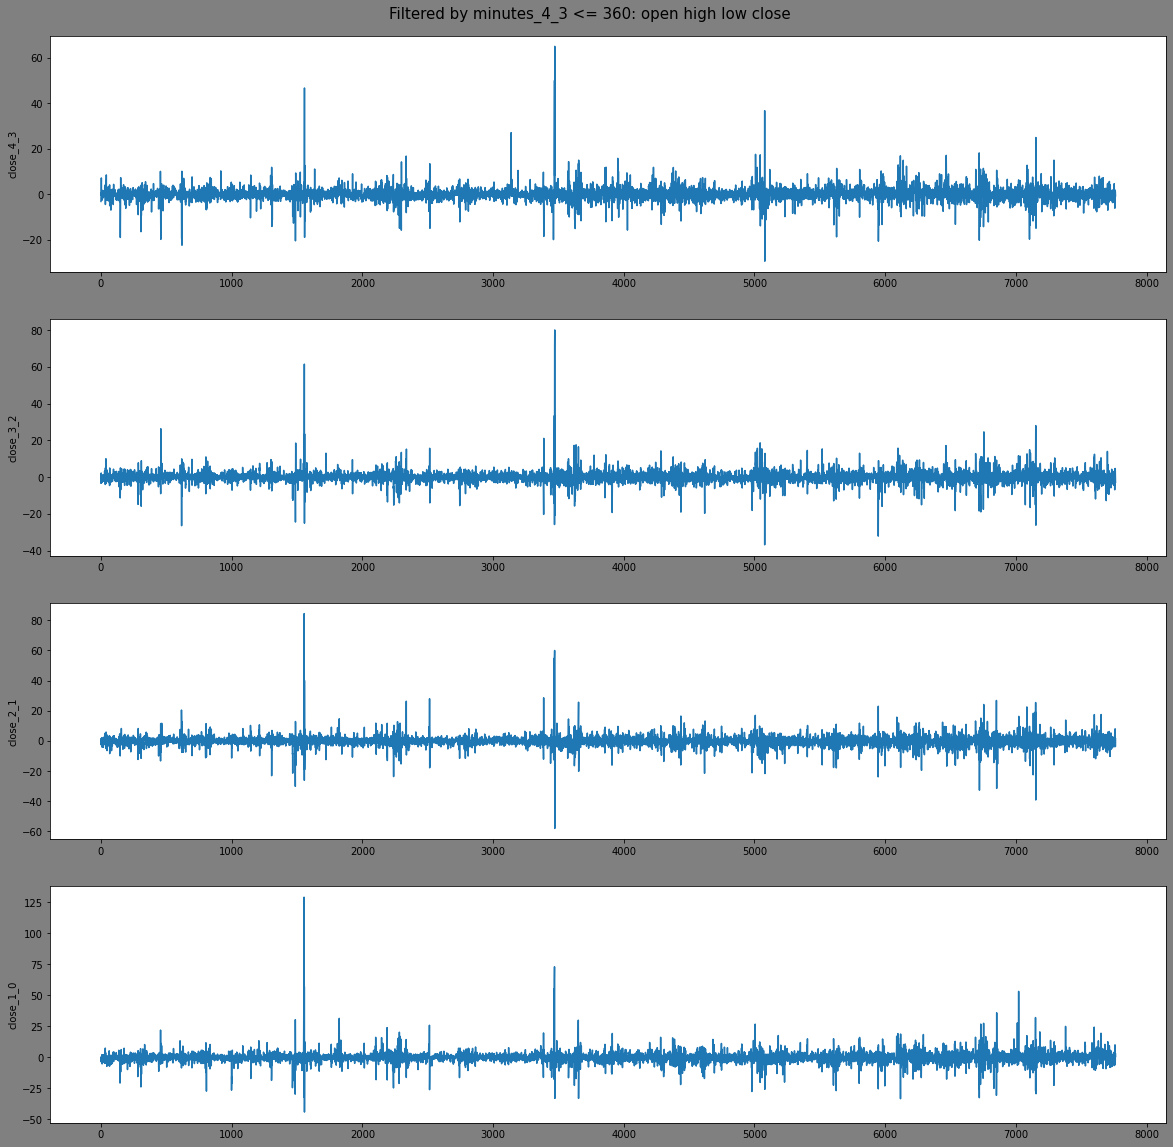

Plots for volume:


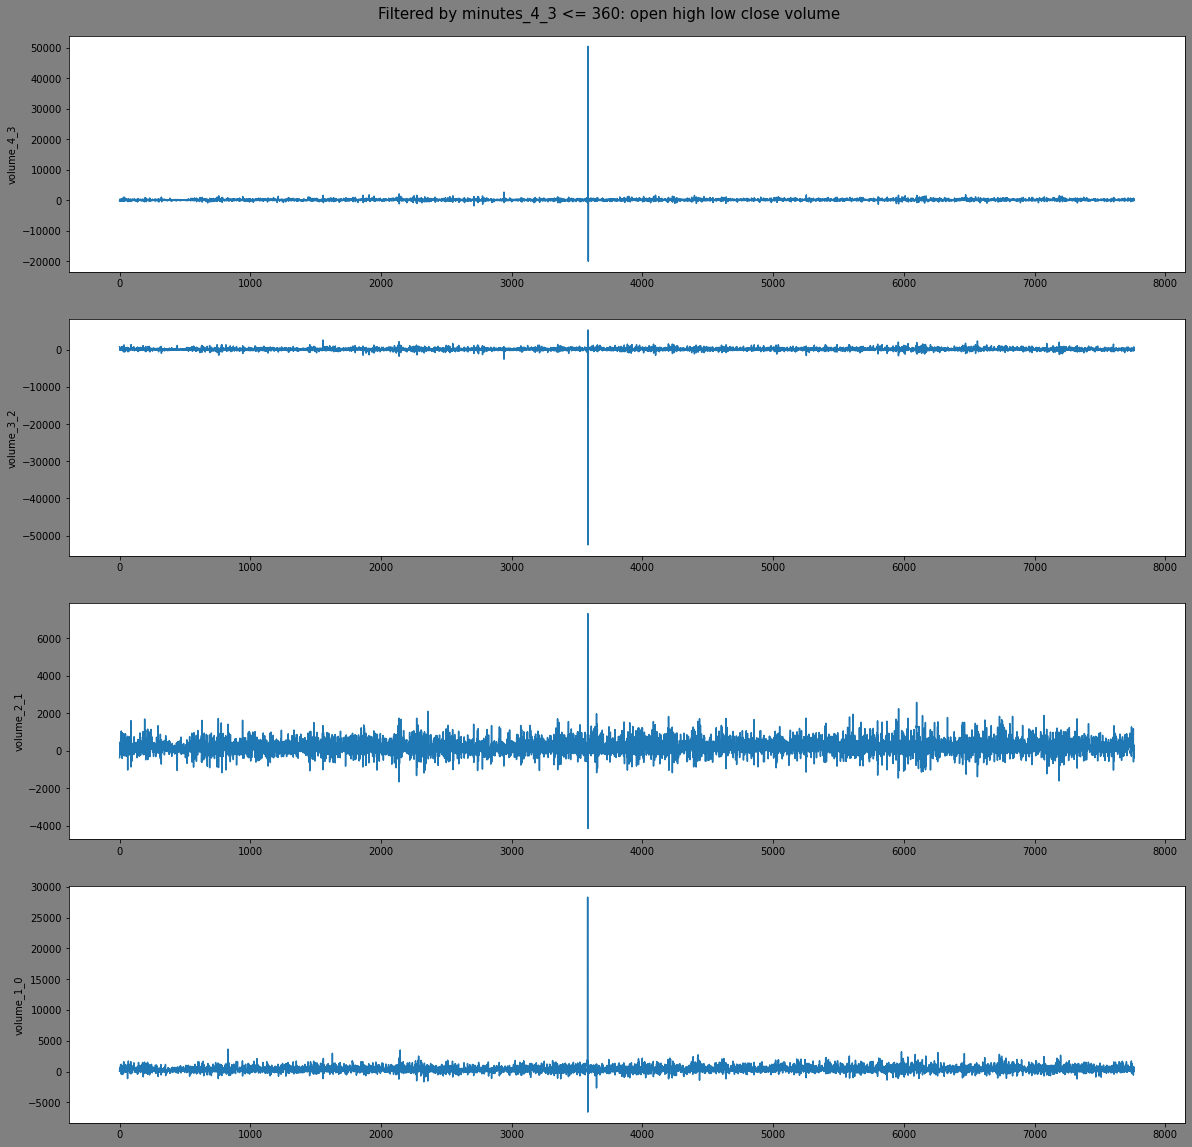

Plots for minutes:


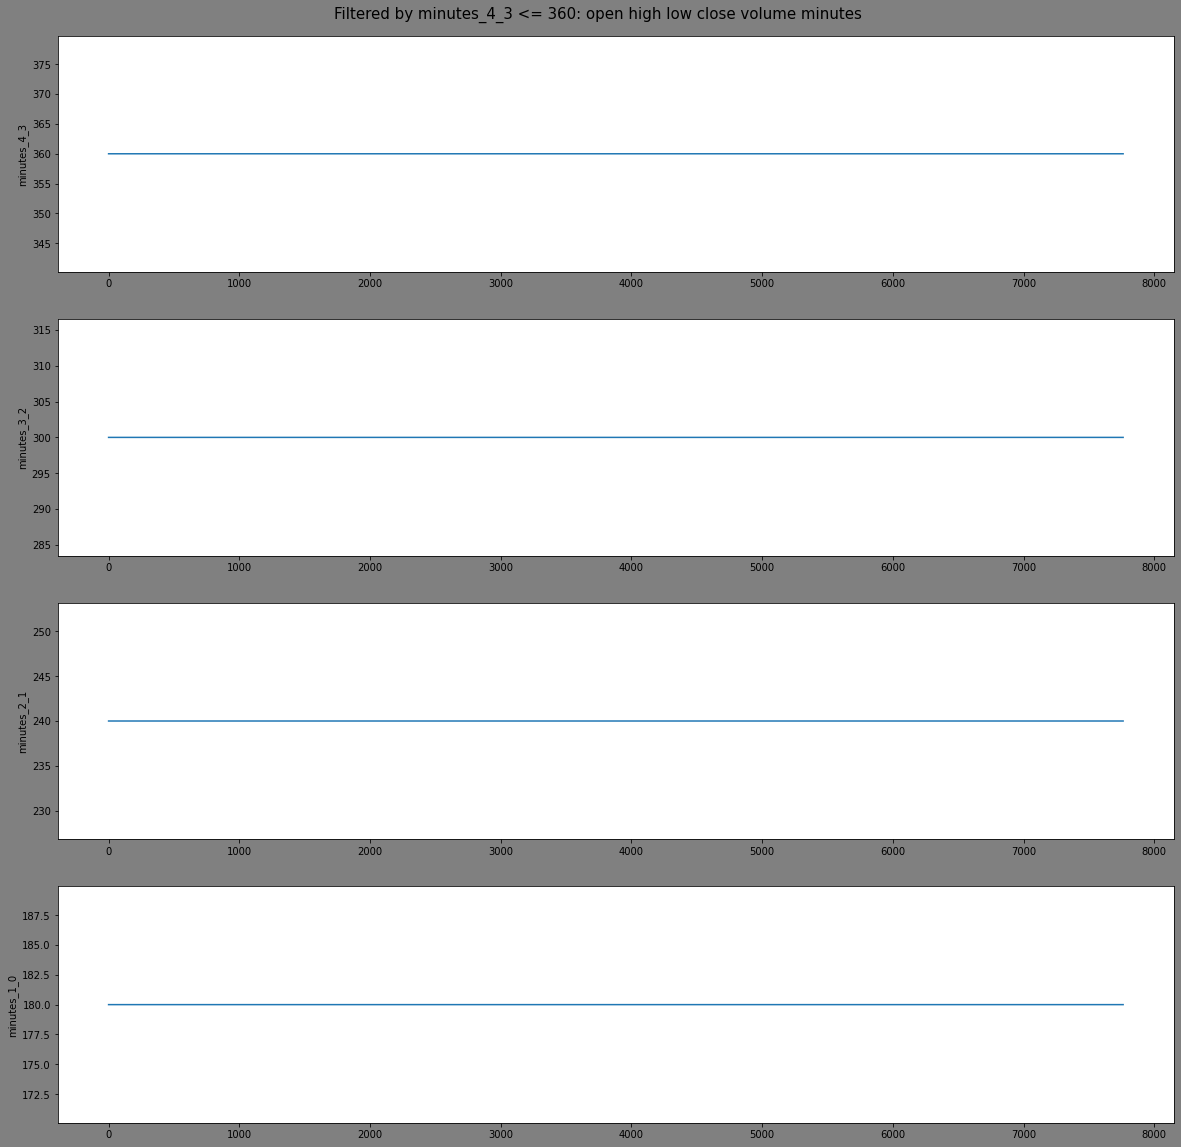

In [85]:
df_to_plot = X_train_5.copy()
df_to_plot = df_to_plot.loc[(df_to_plot["minutes_4_3"]<=360)].reset_index()
title = "Filtered by minutes_4_3 <= 360:"
plot_subplots_wrapper(df_to_plot, title)

## Distributions

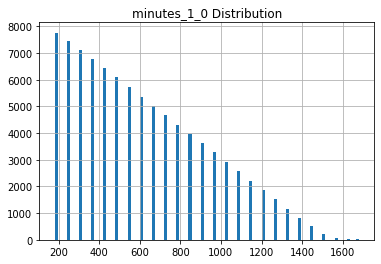

In [86]:
col = "minutes_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

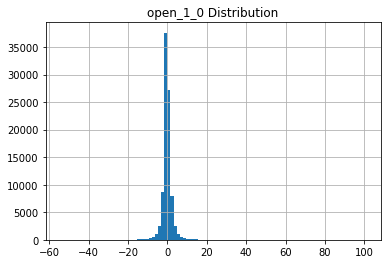

In [87]:
col = "open_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

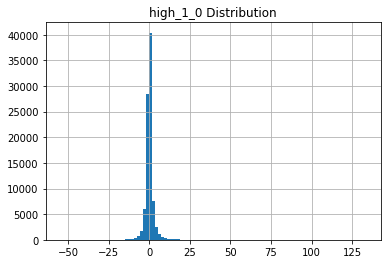

In [88]:
col = "high_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

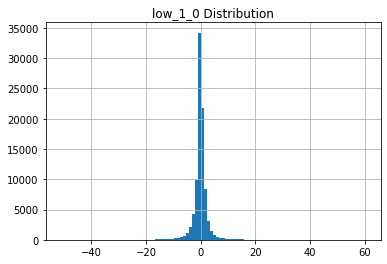

In [89]:
col = "low_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

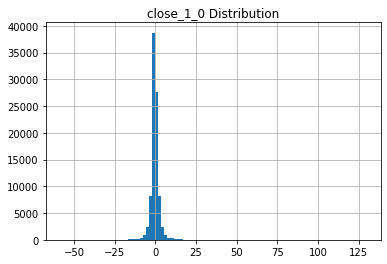

In [90]:
col = "close_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

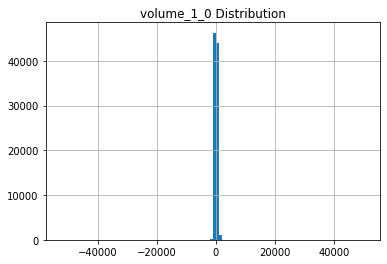

In [91]:
col = "volume_1_0"
X_train_5[col].hist(bins=100)
plt.title(f"{col} Distribution")
plt.show()

## Target comparison

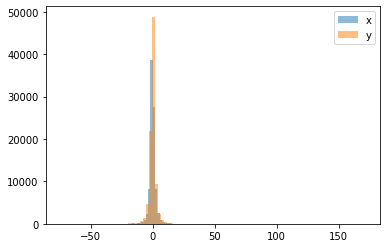

In [92]:
bins = 100
plt.hist(X_train_5["close_1_0"], bins=bins, alpha=0.5, label='x')
plt.hist(y_train_5, bins=bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

Let's try with a different scale...

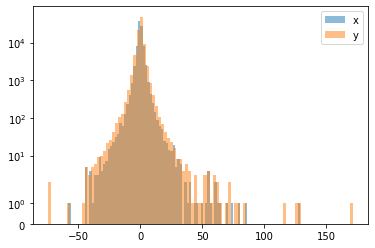

In [93]:
bins = 100
plt.hist(X_train_5["close_1_0"], bins=bins, alpha=0.5, label='x')
plt.hist(y_train_5, bins=bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.yscale("symlog")
plt.show()

Okay let's just try to "zoom in"

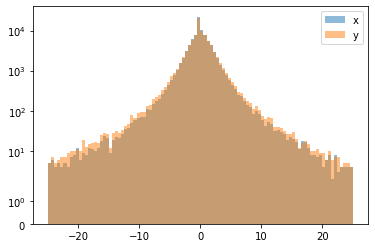

In [94]:
bins = 100
plt.hist(X_train_5.loc[(X_train_5["close_1_0"] > -25) & (X_train_5["close_1_0"] < 25), "close_1_0"], bins=bins, alpha=0.5, label='x')
plt.hist(y_train_5.loc[(y_train_5["y"] > -25) & (y_train_5["y"] < 25), "y"], bins=bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.yscale("symlog")
plt.show()

Let's check how much the target actually deviates from the preceding closing prices

In [95]:
close_target_comp = X_train_5.copy()
close_target_comp = close_target_comp.loc[:,close_target_comp.columns.str.startswith("close")]
close_target_comp["target"] = y_train_5["y"]

In [96]:
for col in close_target_comp.columns[:-1]:
    close_target_comp[col+"_dev"] = close_target_comp[col] / close_target_comp["target"]


In [97]:
close_target_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close_4_3      91512 non-null  float64
 1   close_3_2      91512 non-null  float64
 2   close_2_1      91512 non-null  float64
 3   close_1_0      91512 non-null  float64
 4   target         91512 non-null  float64
 5   close_4_3_dev  87666 non-null  float64
 6   close_3_2_dev  87615 non-null  float64
 7   close_2_1_dev  87379 non-null  float64
 8   close_1_0_dev  87037 non-null  float64
dtypes: float64(9)
memory usage: 6.3 MB


In [101]:
close_target_comp.loc[close_target_comp["target"] == 0].count()

close_4_3        10307
close_3_2        10307
close_2_1        10307
close_1_0        10307
target           10307
close_4_3_dev     6461
close_3_2_dev     6410
close_2_1_dev     6174
close_1_0_dev     5832
dtype: int64

## Calculated Metrics

In [109]:
metrics_df = pd.DataFrame()
for col in X_train_5.columns:
    metrics_df[col] = [X_train_5.loc[X_train_5[col]==0, col].count()]

In [112]:
metrics_df.T

,0
total_hours,0
dlvry_weekend,66052
dlvry_bank_holiday,88595
dlvry_day_sin,0
dlvry_day_cos,0
dlvry_weekday_sin,12923
dlvry_weekday_cos,0
dlvry_hour_sin,587
dlvry_hour_cos,0
lasttrade_weekend,65984


In [47]:
###--- DEPRECATED ---###

# ylim = len(y_train_5)
# #ylim = 24*365
# x1 = np.linspace(0, ylim, num=ylim)

# cols = [*range(6)]
# labels = ["Open", "High", "Low", "Close", "Volume", "Minutes left"]
# ys = []
# count = 0
# #df_plot = X_train_5_original.copy().iloc[:(24*365), :]
# df_plot = X_train_5_original.copy()
# for col in cols:
#     ys.append(df_plot[str(col)])
#     count += 1


# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,15))
# fig.suptitle('Dependent variable and t-3 candle data over one year')


# ax1.plot(x1, ys[0])
# ax1.set_ylabel(labels[0])

# ax2.plot(x1, ys[1])
# ax2.set_ylabel(labels[1])

# ax3.plot(x1, ys[2])
# ax3.set_ylabel(labels[2])

# ax4.plot(x1, ys[3])
# ax4.set_ylabel(labels[3])

# ax5.plot(x1, ys[4])
# ax5.set_ylabel(labels[4])

# ax6.plot(x1, ys[5])
# ax6.set_ylabel(labels[5])

# ax6.set_xlabel('time (h)')

# fig.set_facecolor("grey")

# plt.show()

# Thoughts

In terms of data preparation:

__Blunt thesis__: Measures that we try to engineer from the candles are inherently already present in the dataset and can be detected and modeled by the algorithm

_Feature Selection_:
* Drop features might increase performance (?)
* Also try 5 and 15 window-size